# Práctica 1: Calidad del vino

Nombres: Ignacio Tejero, Miguel Angle Lobo, Diego Viñals

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings

# Desactivar los warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('./Dataset_lab04/vinos.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [22]:
# Seleccionar las columnas deseadas
columnas_seleccionadas = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides"]
datos_seleccionados = df[columnas_seleccionadas]
datos_seleccionados

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides
0,7.4,0.700,0.00,1.9,0.076
1,7.8,0.880,0.00,2.6,0.098
2,7.8,0.760,0.04,2.3,0.092
3,11.2,0.280,0.56,1.9,0.075
4,7.4,0.700,0.00,1.9,0.076
...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090
1595,5.9,0.550,0.10,2.2,0.062
1596,6.3,0.510,0.13,2.3,0.076
1597,5.9,0.645,0.12,2.0,0.075


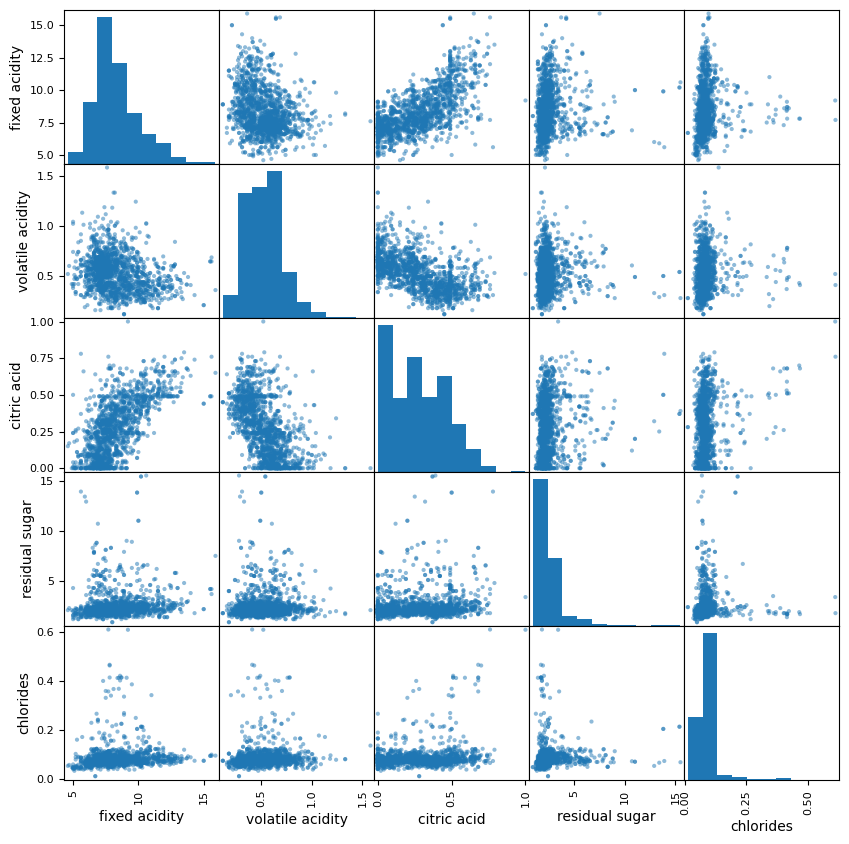

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.50      0.62      0.55       130
           6       0.46      0.55      0.50       132
           7       0.50      0.02      0.05        42
           8       0.00      0.00      0.00         5

    accuracy                           0.48       320
   macro avg       0.24      0.20      0.18       320
weighted avg       0.46      0.48      0.43       320



In [23]:

# Seleccionar las características deseadas
columnas_seleccionadas = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides"]
datos_seleccionados = df[columnas_seleccionadas]

# Crear el diagrama de dispersión
pd.plotting.scatter_matrix(datos_seleccionados, figsize=(10, 10))
plt.show()

# Definir las características seleccionadas y la variable objetivo
X = datos_seleccionados
y = df["quality"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Actualizar la lista de nombres de objetivo
target_names = [str(i) for i in sorted(df["quality"].unique())]

# Imprimir el informe de clasificación
print(classification_report(y_test, y_pred, target_names=target_names))

Apartado A) 

Tras observar las 5 caracteristicas mas influyen construimos los diagramas de dispersion con estas caracterustocas. Es decir, se construiyen varios diagramas de dispersion que relacionen las caracteristicas entre si. 

A medida que aumenta el acido citrico, vemos que aumenta linealmente la acidez fija. Por el contriario, A medida que aumenta el acudo volatil, vemos que disminuye el acido citrico. Cuanto mas azucar residual, vemos que el acido citrico no varia. Tambien, a medida que aumnetan los cloruros, vemos que no afecta al acido citrico.